In [7]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.integrate import quad_vec, dblquad, tplquad
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import welch
from scipy import stats as st
#import PyQt5
from tqdm import tqdm
import rainflow
from scipy.stats import gaussian_kde
from scipy.integrate import simpson
from sklearn.decomposition import PCA
import random
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch
import gpytorch
from matplotlib import cm
from matplotlib.colors import LightSource

In [8]:
DEL= pd.read_excel(r'ML_course project.xlsx',sheet_name='damage')
Wave = pd.read_excel(r'ML_course project.xlsx',sheet_name='wave data')

In [9]:
D=[]
Hs=[]
Tp=[]
for i in range(len(Wave.iloc[:,0])):
    Hs.append(Wave.iloc[i,0])
    Tp.append(Wave.iloc[i,1])
    index=Wave.iloc[i,0]/0.05*201+(Wave.iloc[i,1]-2)/0.05
    D.append(DEL.iloc[int(index),2])

In [10]:
print('exact solution='+str(np.mean(D)))

exact solution=1.0243125490765762e-05


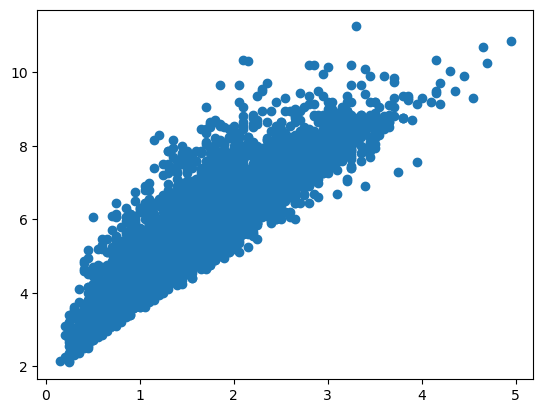

In [11]:
plt.scatter(Hs,Tp);

In [12]:
X = np.array([list(Hs),list(Tp)]).T
model = PCA(n_components=2)
pca = model.fit(X)
X_save = model.transform(X)

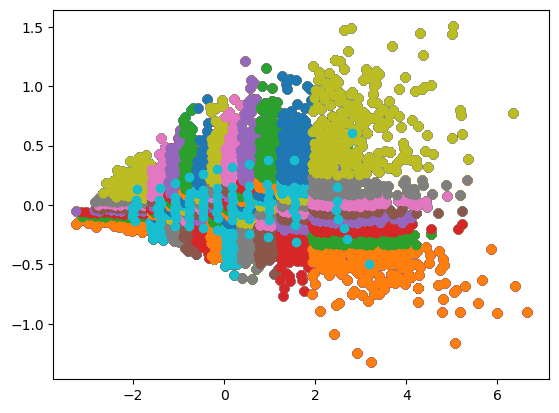

In [13]:
# PCA

ymean=[]
xmean=[]
for m in range(10):
    for n in range(8):
        j=0
        gridx=2+m
        gridy=1+n
        H=X_save[:,0]
        T=X_save[:,1]
        D2=D
        H,T,D2= zip(*sorted(zip(H,T,D2)))
        RH=[]
        RT=[]
        ReD=[]
        #print(T,D2)
        for i in range(gridx):
            CH=H[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CT=T[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CD=D[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CT,CH,CD= zip(*sorted(zip(CT,CH,CD)))
            for j in range(gridy):
                DH=CH[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                DT=CT[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                DD=CD[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                plt.scatter(DH,DT)
                ReD.append(np.mean(DD))
                RH.append(np.mean(DH))
                RT.append(np.mean(DT))

        R=np.array([list(RH),list(RT)]).T
        # print(R[0])
        SS=(model.inverse_transform(R))
        # print(len(X_save[:,0]),j)
        Re=np.round(SS * 2,1) / 2
        # print(Re)
        plt.scatter(R[:,0],R[:,1])
        PCAD=[]
        for k in range(gridx*gridy):
            index=Re[k,0]/0.05*201+(Re[k,1]-2)/0.05
            PCAD.append(DEL.iloc[int(index),2])
        ymean.append(np.mean(PCAD))
        xmean.append(gridx*gridy)

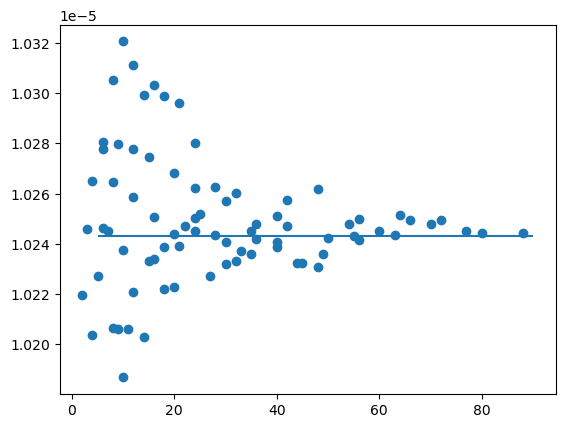

In [14]:
plt.scatter(xmean,ymean)
plt.hlines(1.0243125490765762e-05,5,90);

In [15]:
print(PCAD,ReD)
print((np.array(PCAD)-np.array(ReD))/np.array(ReD))

[9.515561265619091e-06, 9.51319623231214e-06, 9.494822934948871e-06, 9.494822934948871e-06, 9.491539368055755e-06, 9.500792244140324e-06, 9.497263060274646e-06, 9.53146527773132e-06, 9.761080179827963e-06, 9.708494606605809e-06, 9.661982230401185e-06, 9.661982230401185e-06, 9.621905155088716e-06, 9.597923073926735e-06, 9.580585892516889e-06, 9.539434267200953e-06, 9.744054199116036e-06, 9.60635957741465e-06, 9.617708785563654e-06, 9.588438299801486e-06, 9.556959576684453e-06, 9.563570512811775e-06, 9.506769806159859e-06, 9.495500751891485e-06, 9.532308687478673e-06, 9.50300991997949e-06, 9.491808000059455e-06, 9.472731741175165e-06, 9.456676742150644e-06, 9.45623356749172e-06, 9.452113889342644e-06, 9.476242815107156e-06, 9.483699720483153e-06, 9.476312891584623e-06, 9.474514628406675e-06, 9.467028859441906e-06, 9.455398618749196e-06, 9.462240481839662e-06, 9.469431695001547e-06, 9.488530427685781e-06, 9.637736132708256e-06, 9.5853990446669e-06, 9.56373735058264e-06, 9.584938520536179e

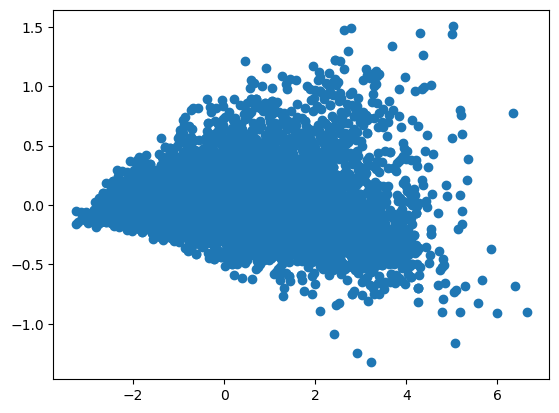

In [16]:
plt.scatter(X_save[:,0],X_save[:,1]);

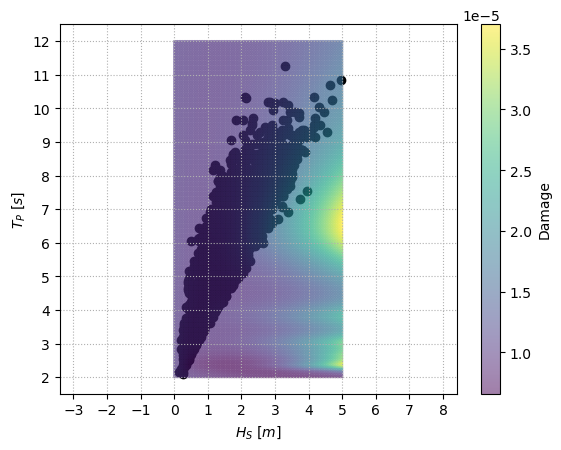

In [17]:
SHs=[]
STp=[]
SD=[]
for i in range(len(DEL.iloc[:,0])):
    SHs.append(DEL.iloc[i,0])
    STp.append(DEL.iloc[i,1])
    SD.append(DEL.iloc[i,2])
plt.figure()
plt.scatter(Hs, Tp, color='k')
plt.scatter(SHs, STp, c=SD, cmap='viridis', s=0.5, alpha=0.5 )
cbar=plt.colorbar(label='Damage')
plt.xlabel('$H_S$ $[m]$'); plt.ylabel('$T_P$ $[s]$')
plt.grid(axis='both', linestyle=':');
plt.xticks(range(-3, 9, 1)); plt.yticks(range(2, 13, 1));
plt.axis('equal');

In [19]:
# K-means

from sklearn.cluster import KMeans

X=list(zip(Hs,Tp))
X=np.array(X)

k_values2=list(range(2,90))

d_k_values2_dis=[]
for k in k_values2:
    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    # print(f"\n*Results for k={k} clusters:")
    # print("Cluster Centers:")
    # print(cluster_centers)
    
    # plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
    # plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='r', edgecolors='k', marker='^', label='Cluster Centers')
    # plt.xlabel('$H_S$ $[m]$')
    # plt.ylabel('$T_P$ $[s]$')
    # plt.grid(axis='both', linestyle=':')
    # plt.axis('equal')
    # plt.show();

    # Damage at cluster centers
    cluster_centers_dis = np.round(cluster_centers*2,1)/2
    damage_values = []
    for i in range(k):
        condition = ( SHs==cluster_centers_dis[i,0] ) & ( STp==cluster_centers_dis[i,1] )
        # print("Number of SD values: ",np.count_nonzero(condition))
        damage_i = pd.DataFrame(SD).loc[condition]
        damage_values.append(damage_i)
        # print(f"Damage at cluster {i} center: {damage_i.iloc[0,0]}")
        
    # Probability of clusters
    cluster_counts = np.bincount(labels)
    cluster_prob = cluster_counts / len(labels)
    # print("Cluster Probabilities:")
    # print(cluster_prob)

    # Calculate the overall damage for the current value of k
    d_k = np.sum( np.array(damage_values).flatten() * cluster_prob[:k] )
    d_k = np.sum( np.array(damage_values).flatten() * np.array(cluster_prob) )
    # print(f"Overall damage for k={k}: {d_k}")
    d_k_values2_dis.append(d_k)
    
print("\n**List of overall damage values for each k:")
print(d_k_values2_dis)

C:\Users\kc43379\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kc43379\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kc43379\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kc43379\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of


**List of overall damage values for each k:
[1.0149476615556559e-05, 1.0245503117477758e-05, 1.0206679555331085e-05, 1.0172612390937289e-05, 1.0218584426309536e-05, 1.0210701185706571e-05, 1.0210725982479623e-05, 1.0210271300489317e-05, 1.0190127555707513e-05, 1.0201300957941182e-05, 1.020080274391639e-05, 1.02183525078445e-05, 1.0215632748788552e-05, 1.0192710512951239e-05, 1.0215847019263227e-05, 1.0226548328847825e-05, 1.0221859335351615e-05, 1.0212562952007772e-05, 1.0210236767682714e-05, 1.0206304744203046e-05, 1.0225774814426882e-05, 1.0219293421025151e-05, 1.0230581326401884e-05, 1.022592577270362e-05, 1.0219767102986961e-05, 1.0225079443813888e-05, 1.0230906846051104e-05, 1.0232268149680625e-05, 1.0234377536925271e-05, 1.0228002064029783e-05, 1.0232793395648184e-05, 1.0229299423556673e-05, 1.0228173223078413e-05, 1.0231310775462077e-05, 1.0230085963935098e-05, 1.0230323968420074e-05, 1.0225200669026188e-05, 1.0240346332290786e-05, 1.024018569815711e-05, 1.0234033317919301e-05,

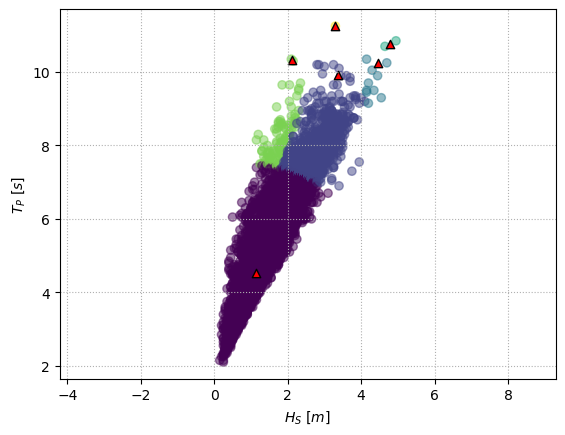

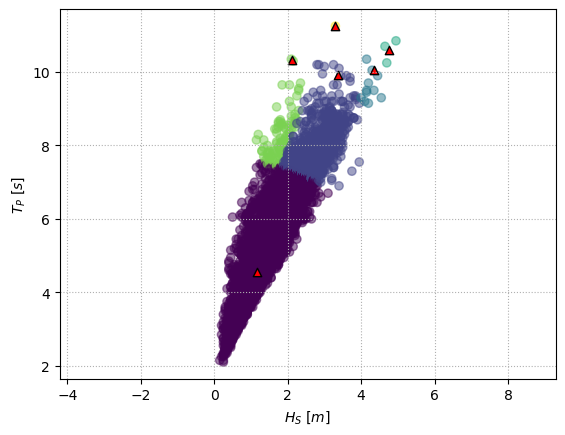

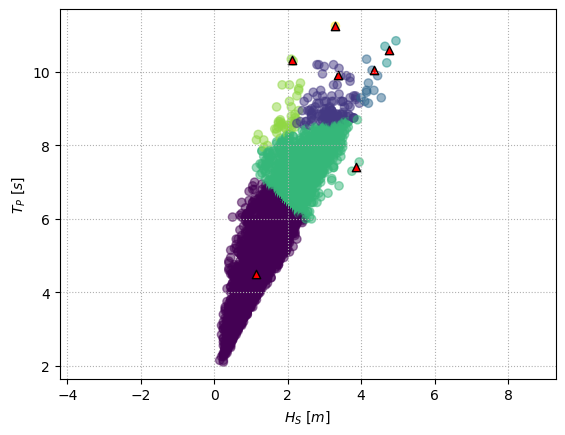

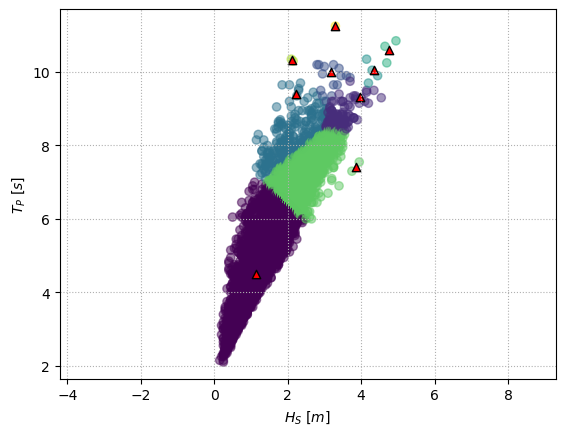

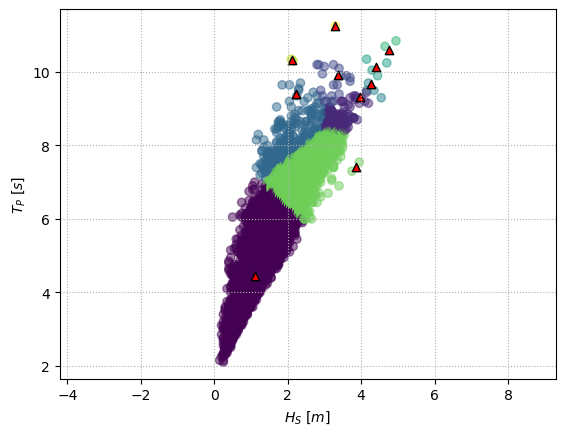

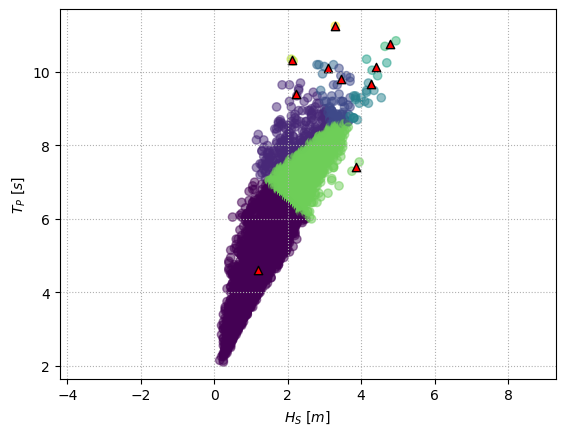

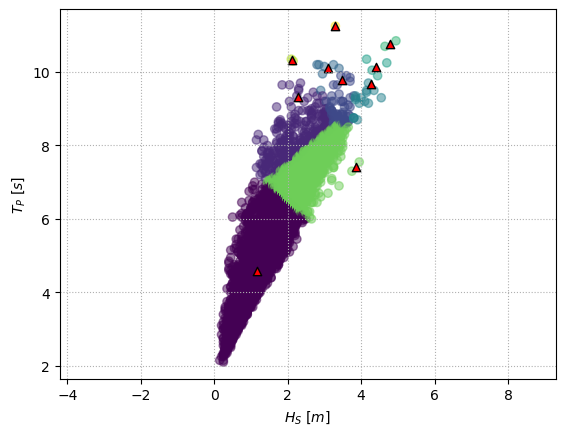

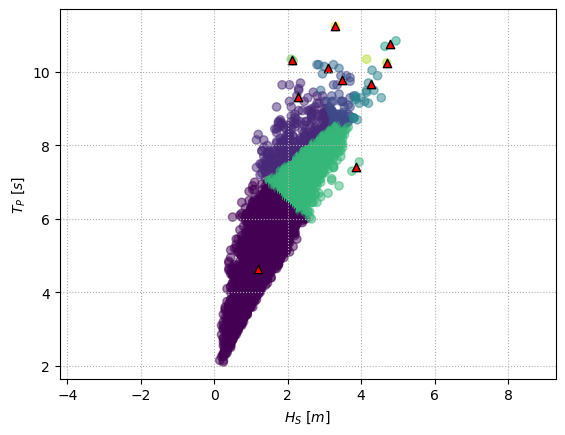

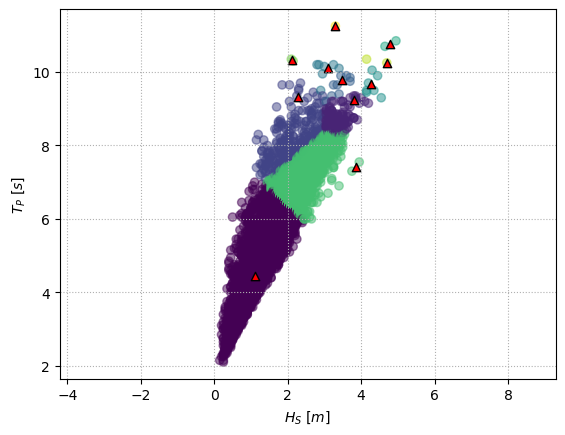

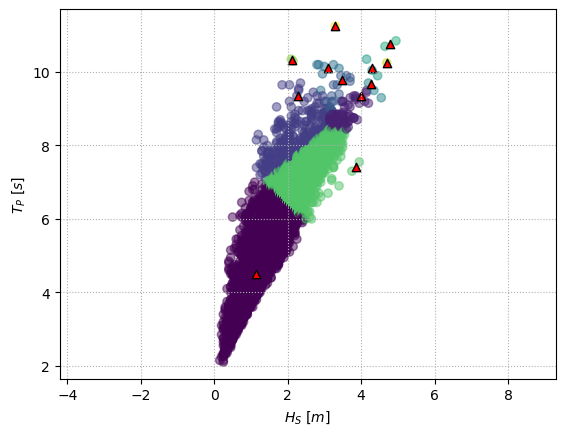

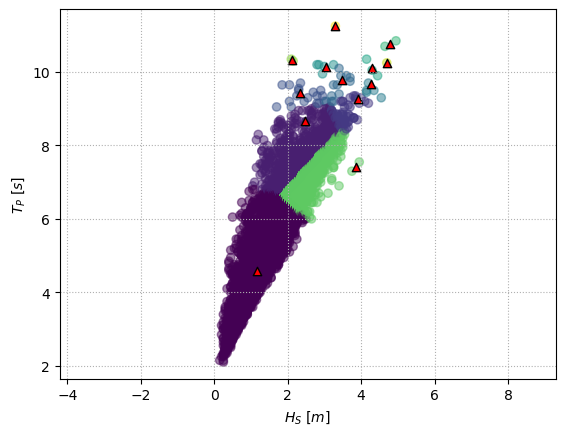

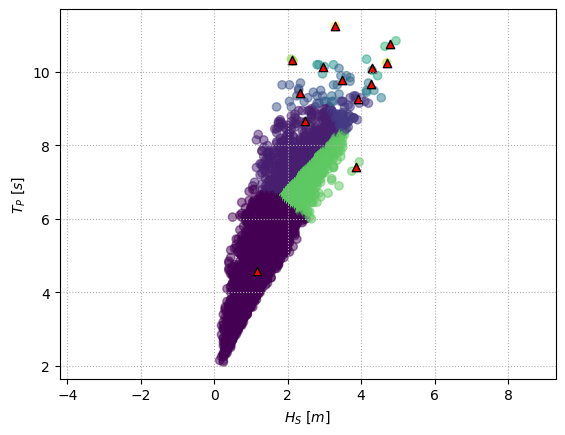

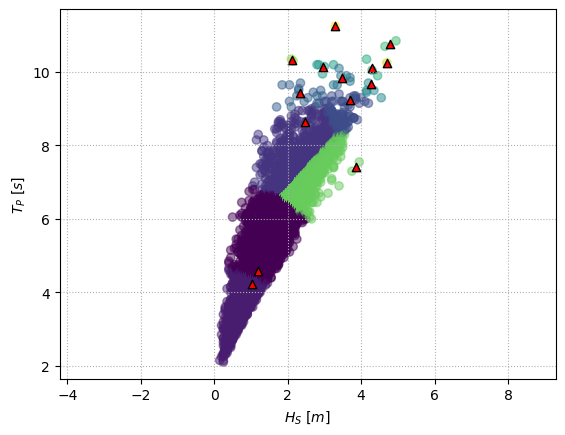

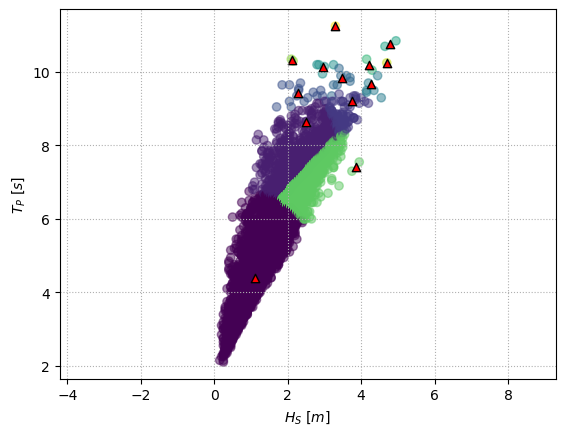

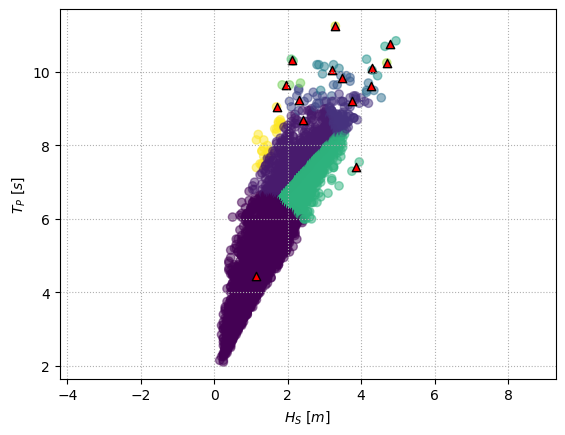

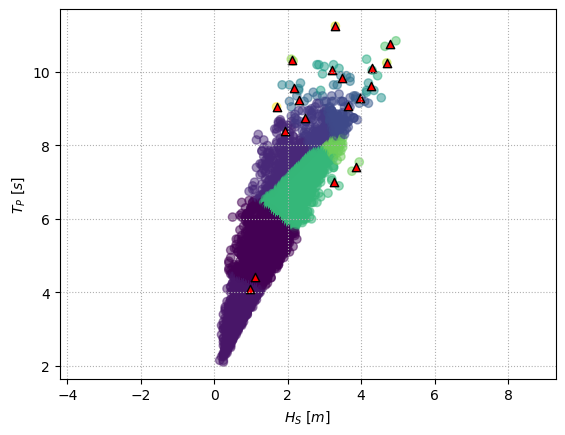

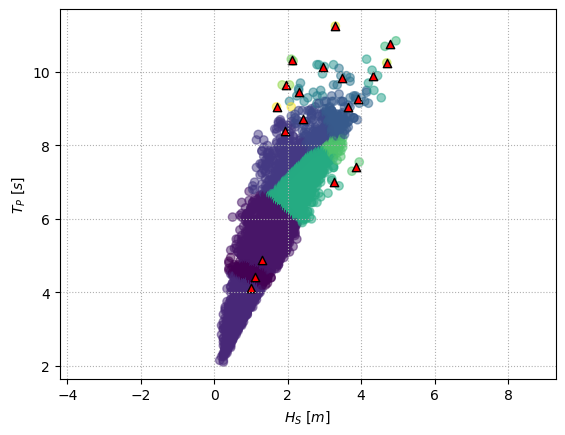

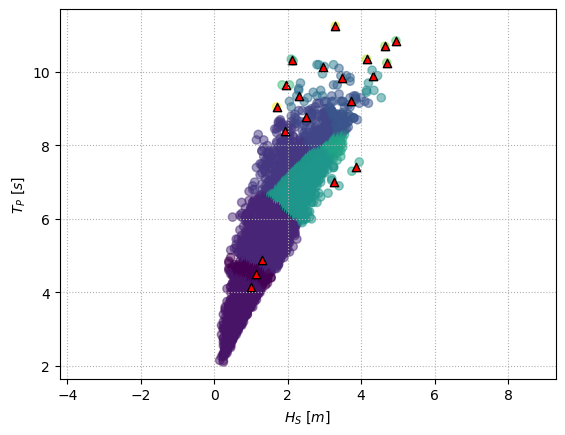

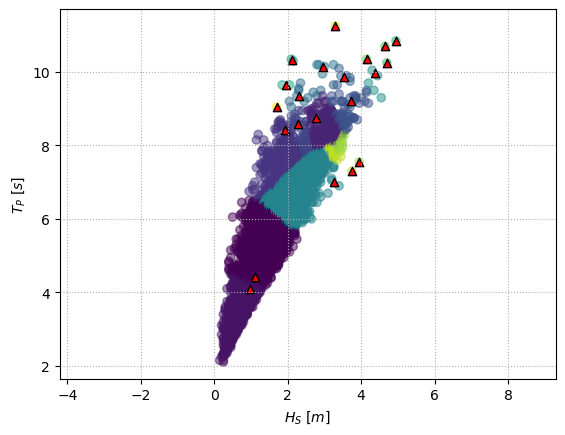

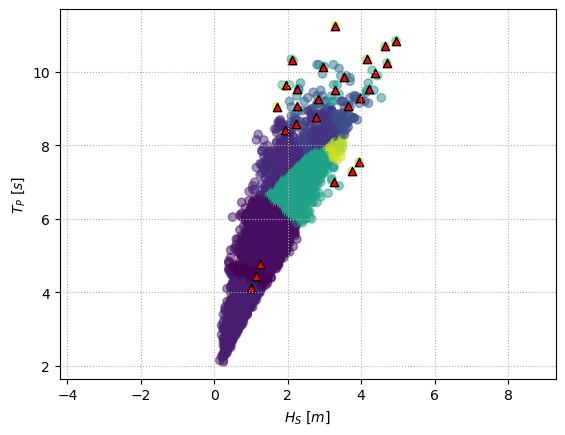

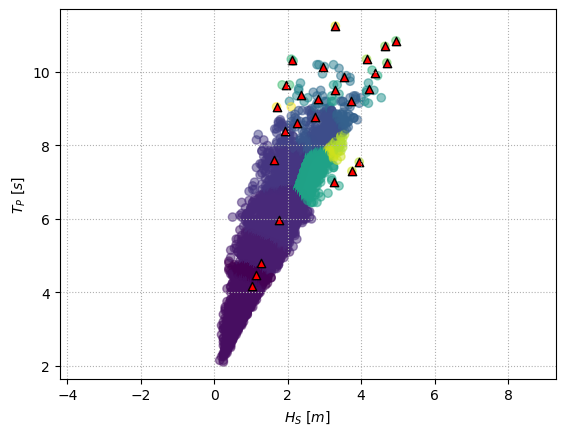

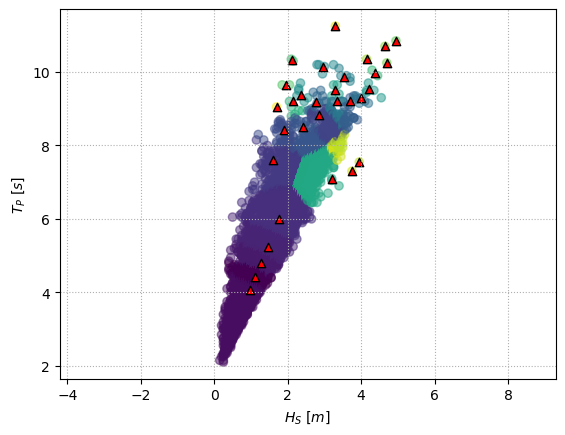

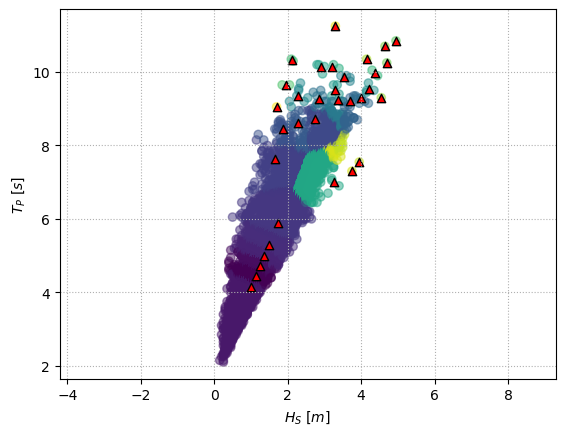

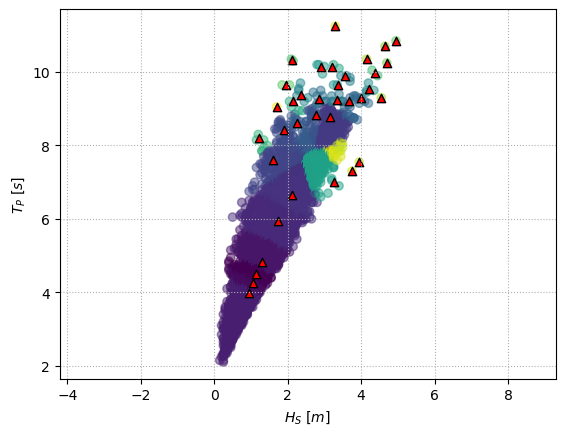

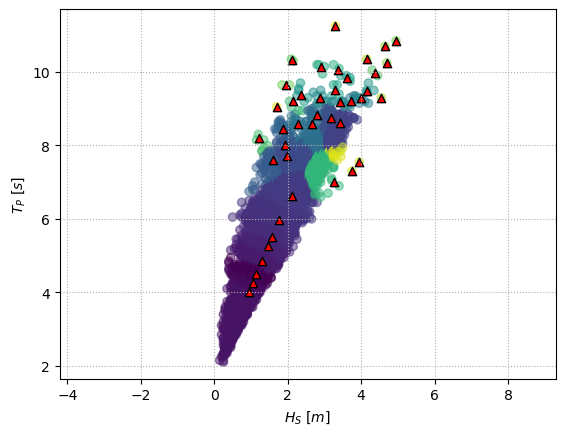

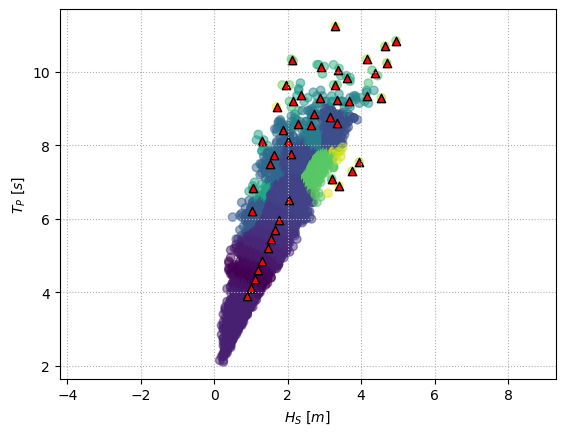

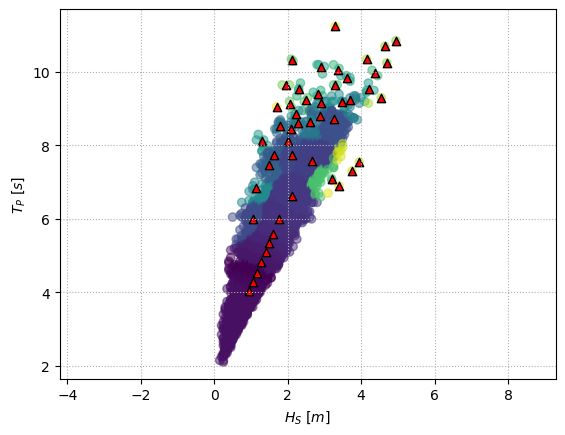

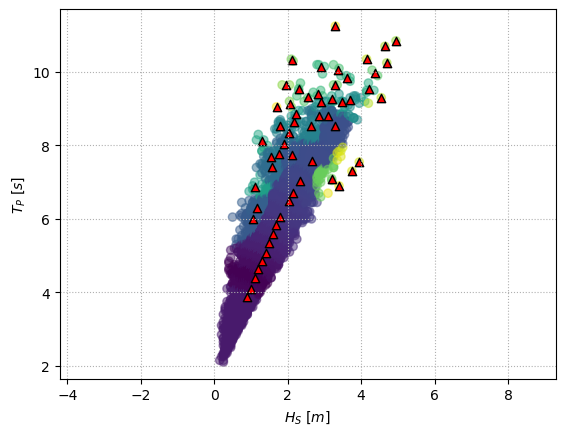

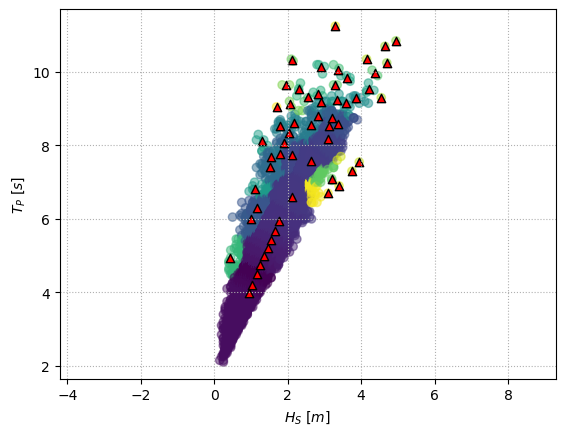

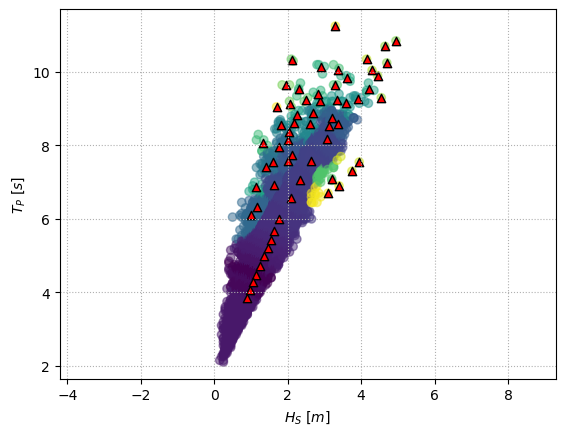

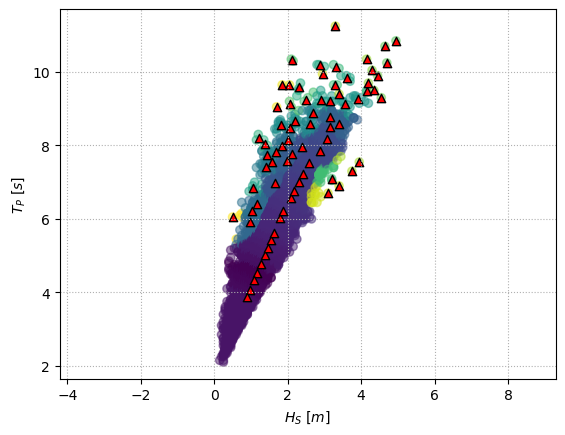

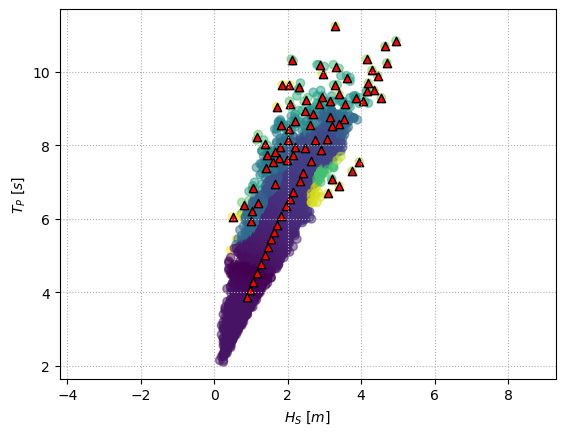

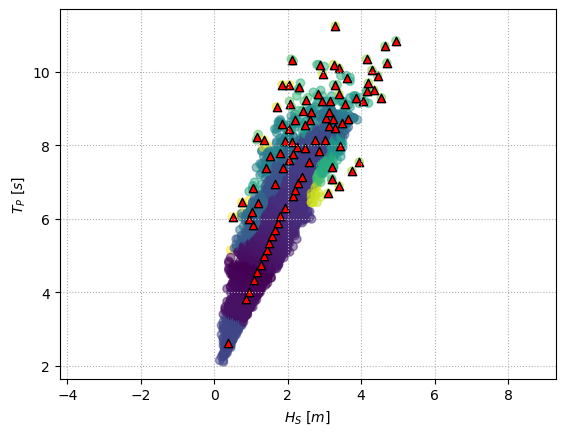


**List of k:
[6, 6, 7, 9, 10, 10, 10, 10, 11, 12, 13, 13, 14, 13, 15, 19, 19, 20, 21, 27, 27, 31, 33, 36, 42, 47, 50, 58, 58, 63, 76, 85, 94]

**List of overall damage values for each bandwidth (or k):
[9.682587511302413e-06, 9.672151029320604e-06, 1.1164548604248393e-05, 1.1097651611231753e-05, 1.1155540155897872e-05, 1.0996670707923394e-05, 1.1012330543990835e-05, 1.0972886303492332e-05, 1.1139884773356291e-05, 1.1085603272830552e-05, 1.0597496847745697e-05, 1.0596980987511124e-05, 1.0562053522769675e-05, 1.0745833190210959e-05, 1.0733029675707802e-05, 1.1166309327118994e-05, 1.0799054239207062e-05, 1.0783417162847404e-05, 1.1166155189519797e-05, 1.0852373288421243e-05, 1.0266310657898411e-05, 1.0297768084055092e-05, 1.0263707328848004e-05, 1.030004079768789e-05, 1.0205391369138694e-05, 1.0206437353639024e-05, 1.0221829685969253e-05, 1.02299569023749e-05, 1.0212064487519823e-05, 1.0231832975469673e-05, 1.0234996969583075e-05, 1.0222582473330742e-05, 1.023135500133519e-05]
Total exec

In [31]:
import time
start_time = time.time()

# Mean shift

from sklearn.cluster import MeanShift

X = list(zip(Hs, Tp))
X = np.array(X)

bandwidth_values = np.arange(0.5, 0.17, -0.01)

d_bandwidth_values = []
num_clusters = []
for bandwidth in bandwidth_values:
    # Mean Shift clustering
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(X)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    num_clusters.append(n_clusters_)
    # print(f"\n*Results for k={n_clusters_} clusters:")
    # print("Cluster Centers:")
    # print(cluster_centers)

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='r', edgecolors='k', marker='^', label='Cluster Centers')
    plt.xlabel('$H_S$ $[m]$')
    plt.ylabel('$T_P$ $[s]$')
    plt.grid(axis='both', linestyle=':')
    plt.axis('equal')
    plt.show()

    # Damage at cluster centers
    cluster_centers = np.round(cluster_centers * 2, 1) / 2
    damage_values = []
    for i in range(len(cluster_centers)):
        condition = (SHs == cluster_centers[i, 0]) & (STp == cluster_centers[i, 1])
        # print("Number of SD values: ", np.count_nonzero(condition))
        damage_i = pd.DataFrame(SD).loc[condition]
        damage_values.append(damage_i)
        # print(f"Damage at cluster {i} center: {damage_i.iloc[0, 0]}")

    # Probability of clusters
    cluster_counts = np.bincount(labels)
    cluster_prob = cluster_counts / len(labels)
    # print("Cluster Probabilities:")
    # print(cluster_prob)

    # Calculate the overall damage for the current bandwidth
    d_bandwidth = np.sum(np.array(damage_values).flatten() * cluster_prob[:len(cluster_centers)])
    # print(f"Overall damage for bandwidth={bandwidth}: {d_bandwidth}")
    d_bandwidth_values.append(d_bandwidth)

print("\n**List of k:")
print(num_clusters)
print("\n**List of overall damage values for each bandwidth (or k):")
print(d_bandwidth_values)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total execution time: {elapsed_time} seconds")

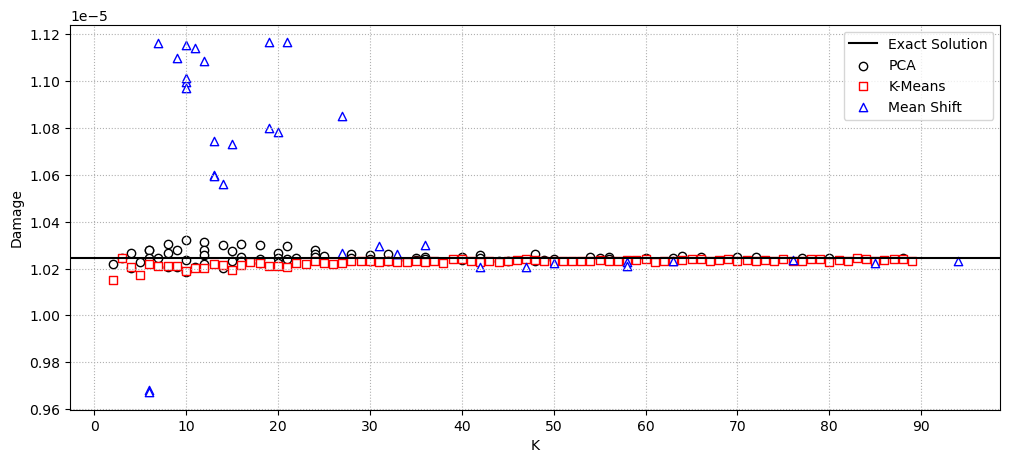

In [48]:
plt.figure(figsize=(12,5))
plt.axhline(y=np.mean(D), color='k', linestyle='-', label='Exact Solution')
plt.scatter(xmean, ymean, color='w', edgecolor='k', marker='o', label='PCA')
plt.scatter(k_values2, d_k_values2_dis, color='w', edgecolor='r', marker='s', label='K-Means')
plt.scatter(num_clusters, d_bandwidth_values, color='w', edgecolor='b', marker='^', label='Mean Shift')
plt.xlabel('K'); plt.ylabel('Damage')
# plt.ylim(1.014e-5,1.033e-5)
plt.xticks([0,10,20,30,40,50,60,70,80,90])
# plt.yticks([1.015e-5,1.0175e-5,1.02e-5,1.0225e-5,1.025e-5,1.0275e-5,1.03e-5,1.0325e-5])
plt.legend(); plt.grid(axis='both', linestyle=':'); plt.show();

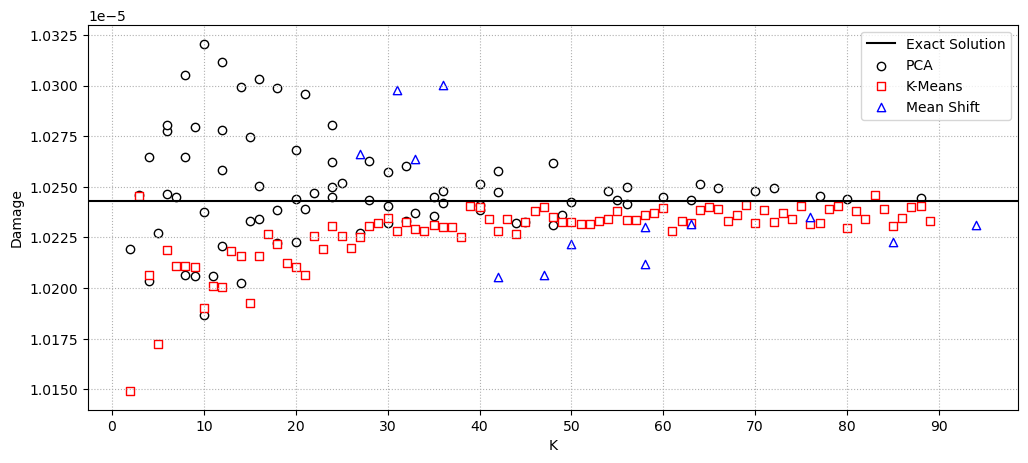

In [49]:
plt.figure(figsize=(12,5))
plt.axhline(y=np.mean(D), color='k', linestyle='-', label='Exact Solution')
plt.scatter(xmean, ymean, color='w', edgecolor='k', marker='o', label='PCA')
plt.scatter(k_values2, d_k_values2_dis, color='w', edgecolor='r', marker='s', label='K-Means')
plt.scatter(num_clusters, d_bandwidth_values, color='w', edgecolor='b', marker='^', label='Mean Shift')
plt.xlabel('K'); plt.ylabel('Damage')
plt.ylim(1.014e-5,1.033e-5)
plt.xticks([0,10,20,30,40,50,60,70,80,90])
plt.yticks([1.015e-5,1.0175e-5,1.02e-5,1.0225e-5,1.025e-5,1.0275e-5,1.03e-5,1.0325e-5])
plt.legend(); plt.grid(axis='both', linestyle=':'); plt.show();